In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [14]:
def pos_r(x, y, z):
    #function to recompute the radius of events due to the posz correction given the x, y and z position
    r = np.sqrt(x**2 + y**2 + z**2)
    return r

# Load Files

In [16]:
file = uproot.open('data/scaled_oscillated_ScintFit_2p2ReactoribdRun_r300000_s0_p0.ntuple.root')
print(file.keys())
output = file['output;1']

['output;1']


# Extract Observables

In [15]:
#validation info
scint_fit = np.array(output['scintFit'])
fit_valid = np.array(output['fitValid'])

condition = (scint_fit & fit_valid)

#event Index
evIndex = np.array(output['evIndex'])  #evIndex = 0 is prompt, and evIndex > 0 is delayed and tails of prompt and delayed

#recons. energy
energy = np.array(output['energy'])

#recons. position
posx = np.array(output['posx'])
posy = np.array(output['posy'])
posz = np.array(output['posz']) - 184.4
posr = pos_r(posx, posy, posz)

#MC info
mcID = np.array(output['mcIndex'])
mc_posx = np.array(output['mcPosx'])
mc_posy = np.array(output['mcPosy'])
mc_posz = np.array(output['mcPosz'])
mc_posr = np.array(output['mcPosr'])

# Time info
clock_count50 = np.array(output['clockCount50'], dtype = np.int64)

#ev info
evID = np.array(output['eventID'])
nhits = np.array(output['nhits'])

# Extract valid info -> Valid scint_fit -------------

evIndex = np.extract(scint_fit, evIndex)

mc_posx = np.extract(scint_fit, mc_posx)
mc_posy = np.extract(scint_fit, mc_posy)
mc_posz = np.extract(scint_fit, mc_posz)

posx = np.extract(scint_fit, posx)
posy = np.extract(scint_fit, posy)
posz = np.extract(scint_fit, posz)
posr = np.extract(scint_fit, posr)

time = np.extract(scint_fit, (clock_count50*20)/1000)  #convert ns to μs

evID = np.extract(scint_fit, evID)

energy = np.extract(scint_fit, energy)

## Separation of Prompt and Delay

In [17]:
#Code to extract smartly the varibles of each eventIndex and to avoid the -9.999e+4 MeV values. However, this proceduce doesnt guarant the pair matching of prompt and delayed events ...

#prefix names of variables
prefix_en = 'energy_evin_'
#prefix_time = 'time_evin_'
#prefix_x = 'pos_x_evin_'
#prefix_y = 'pos_x_evin_'
#prefix_z = 'pos_x_evin_'

#index of variables
type_var = np.unique(evIndex)

energy_index_i = [] #array with the energies of each eventIndex
#time_index_i = []
#pos_x_index_i = []
#pos_y_index_i = []
#pos_z_index_i = []

for i in type_var:
    
    # select eventIndex and energy > 0
    condition = ((evIndex == i) & (energy > 0))
    
    locals()[prefix_en + str(i)] = np.extract(condition, energy)
    #locals()[prefix_time + str(i)] = np.extract(condition, time)
    #locals()[prefix_x + str(i)] = np.extract(condition, posx)
    #locals()[prefix_y + str(i)] = np.extract(condition, posy)
    #locals()[prefix_z + str(i)] = np.extract(condition, posz)

    # Save the observables of each evIndex within a list which indices are the list of results for each evIndex
    energy_index_i.append(locals()[prefix_en + str(i)])
    #time_index_i.append(locals()[prefix_time + str(i)])
    #pos_x_index_i.append(locals()[prefix_x + str(i)])
    #pos_y_index_i.append(locals()[prefix_y + str(i)])
    #pos_z_index_i.append(locals()[prefix_z + str(i)])

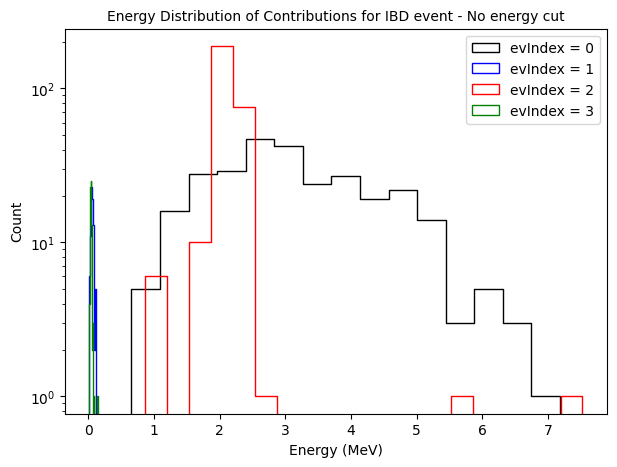

In [20]:
save_fig = False

plot_i = np.unique(evIndex)
color_i = ['black', 'b', 'r', 'g']
bins_i = [15, 10, 20, 15]

plt.figure(figsize=(7,5))

for i in plot_i:
    sn.histplot(energy_index_i[i], bins = bins_i[i], color = color_i[i], element = 'step', alpha = 0.0, label = 'evIndex = '+str(i))

plt.legend(loc = 'upper right')
plt.xlabel('Energy (MeV)')
plt.yscale('log')
plt.title('Energy Distribution of Contributions for IBD event - No energy cut', fontsize = 10)

if save_fig:
    plt.savefig('figs/Energy Distribution of Contributions for IBD event - No energy cut.png', format = 'png', bbox_inches = 'tight')
    
plt.show()